# Flight Price EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the  dataset have? 

In [2]:
flight = pd.read_csv('flight_price.csv')
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flight.shape

(10683, 11)

## After using flight.shape method we can see that there are 10683 rows and 11 columns in the given dataset.

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution. 

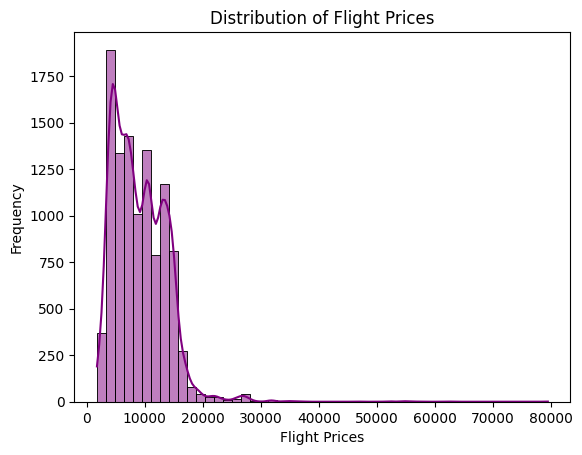

In [4]:
sns.histplot(x = 'Price', bins = 50, kde = True, color = 'purple',data = flight)
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

## Cleary, In histogram, we can see that the distribution is right-skewed.

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price? 

In [5]:
max = flight['Price'].max()

In [6]:
min = flight['Price'].min()

In [7]:
print(f'The range of the "Price" is {max - min} $ with minimum price of {min} $ and maximum price of {max} $.')

The range of the "Price" is 77753 $ with minimum price of 1759 $ and maximum price of 79512 $.


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different  airlines. 

In [8]:
flight['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

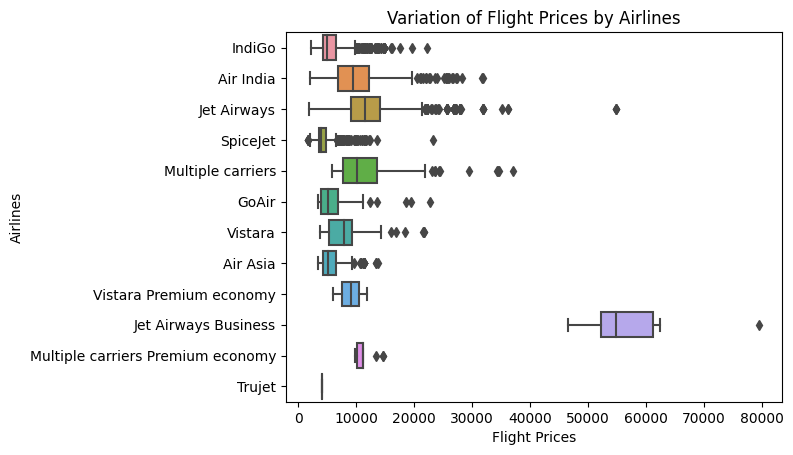

In [9]:
sns.boxplot(x = 'Price', y = 'Airline', data = flight, orient = 'h')
plt.title('Variation of Flight Prices by Airlines')
plt.xlabel('Flight Prices')
plt.ylabel('Airlines')
plt.show()

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis. 

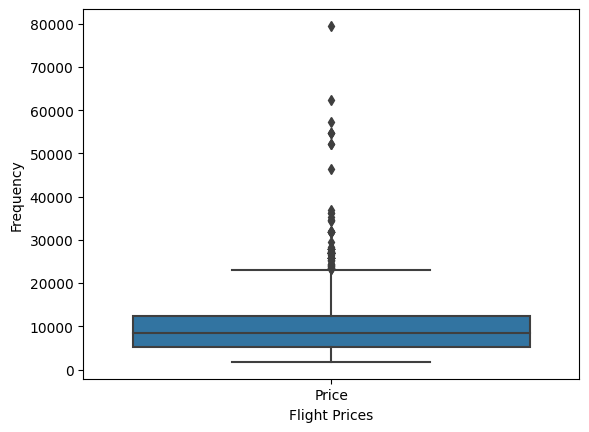

In [10]:
sns.boxplot(data = flight)
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.show()

### Cleary, In boxplot, we can see that the dotted values are outliers and we can calculate the no of outliers using following steps:

In [11]:
flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
IQR = np.percentile(flight['Price'],75) - np.percentile(flight['Price'],25)
IQR

7096.0

In [13]:
upper_fence = np.percentile(flight['Price'],75) + 1.5 * IQR
upper_fence

23017.0

In [14]:
outliers = flight[flight['Price'] > upper_fence]['Price'].count()
outliers

94

## As we see, In our dataset there are 94 outliers. 
### Outliers are data points that are significantly different from the other data points in a dataset. These data points can occur due to measurement errors, data entry errors, or other factors that make them stand out from the rest of the data.

### Outliers can impact our analysis in several ways:

- ### 1. Skewing statistical measures: Outliers can significantly affect measures of central tendency such as the mean or median, leading to a skewed interpretation of the data. 

- ### 2. Distorting relationships between variables: Outliers can also have a significant impact on the correlation or relationship between variables. For instance, if we are analyzing the relationship between weight and height in a population, an outlier who is much taller or heavier than everyone else can skew the relationship, making it seem like there is a stronger or weaker relationship between the two variables than there actually is.

- ### 3. Affecting the accuracy of predictive models: Outliers can significantly impact the accuracy of predictive models, particularly those based on linear regression or other statistical techniques. These models assume that the data is normally distributed and free of outliers, so including outliers in the data can lead to inaccurate predictions.

- ### 4. Reducing the power of statistical tests: Outliers can also reduce the power of statistical tests, making it more difficult to detect significant differences or relationships between variables. This can lead to false negatives, where we fail to detect an effect that is actually present in the data.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset  to identify the peak travel season. What features would you analyze to identify the peak season, and how  would you present your findings to your boss? 

In [15]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## As we can see that the Date_of_Journey feature has month in it, so we can analyze the Date_of_Journey feature to identify the peak season.

In [16]:
flight['month'] = flight['Date_of_Journey'].str.split('/').str[1]

In [17]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03


In [18]:
flight['month'].unique()

array(['03', '05', '06', '04'], dtype=object)

In [19]:
flight['month'] = flight['month'].map({'03':'March','04':'April','05':'May','06':'June'})

In [20]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,May
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,March


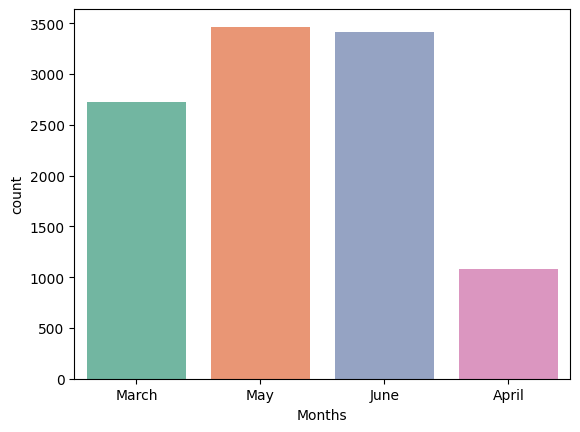

In [21]:
sns.countplot(x = 'month' ,data = flight, palette='Set2')
plt.xlabel('Months')
plt.show()

- ## Above histogram shows that, In whole year only four months 'Mar','April','May' and 'June' has in which people are interested in travelling through flights, and the peak season of travelling is 'May' followd by 'June'. 'April' has least number of interested people in travelling.

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight  Price dataset to identify any trends in flight prices. What features would you analyze to identify these  trends, and what visualizations would you use to present your findings to your team? 

In [22]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,May
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,March


## Flight prices depends on the following four features:
- ### Airline, Source, Destination and Total_Stops

## 1. Airline

In [23]:
flight['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

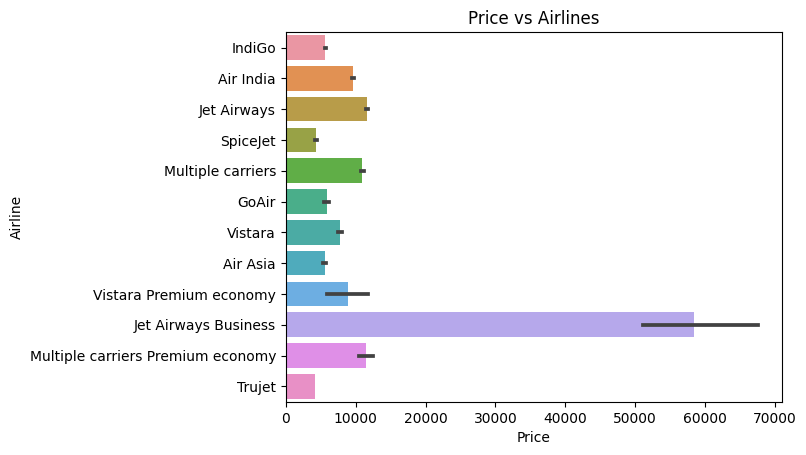

In [24]:
sns.barplot(x = 'Price' ,y='Airline',data=flight)
plt.title('Price vs Airlines')
plt.show()

## As we see in our barplot of 'Price vs Airline', The flight prices of 'jet Airways Business' is too high and the lowest price is of 'Spicejet'.

## 2. Source

In [25]:
flight['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

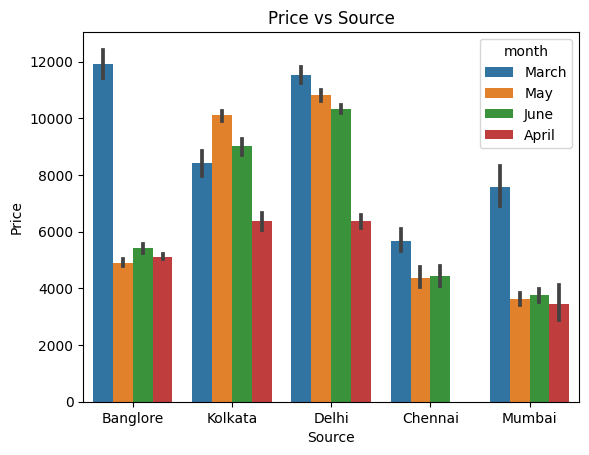

In [26]:
sns.barplot(x = 'Source' ,y='Price',data=flight,hue='month')
plt.title('Price vs Source')
plt.show()

## As we see in our barplot of 'Source vs Price' with hue parameter 'month', The flight prices in 'Banglore' is too high in the month of 'March' but low in rest of three months. While the average flight prices in 'Chennai' is lowest. And also 'Chennai' has only source in which, there is no flight in the month of 'April'

## 3. Destination

In [27]:
flight['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

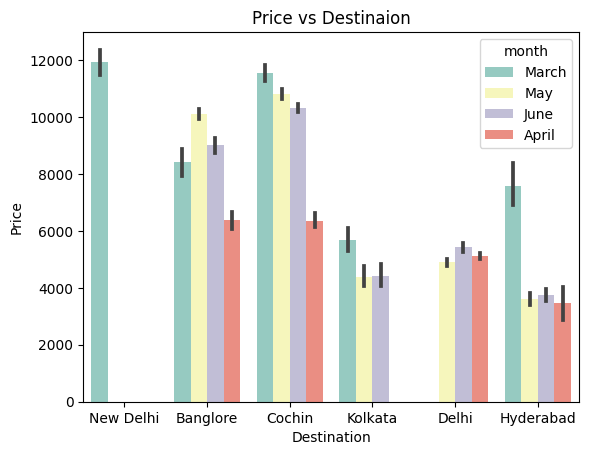

In [28]:
sns.barplot(x = 'Destination' ,y='Price',data=flight,palette='Set3',hue='month')
plt.title('Price vs Destinaion')
plt.show()

## As we see in our barplot of 'Destinaion vs Price', The flight prices for 'New Delhi' is too high in the month of 'March' which is only active month of 'New Delhi' flights. While average lowest price for 'Kolkata' is lowest and in the month of 'April' their is no flight for 'Kolkata'.

## 4. Total_Stops

In [29]:
flight['Total_Stops'].unique() # nan means Null value

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [30]:
flight[flight['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,May


In [31]:
flight['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [32]:
flight['Total_Stops'] = flight['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [33]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,March
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,May
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,June
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,May
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,March


In [34]:
flight['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

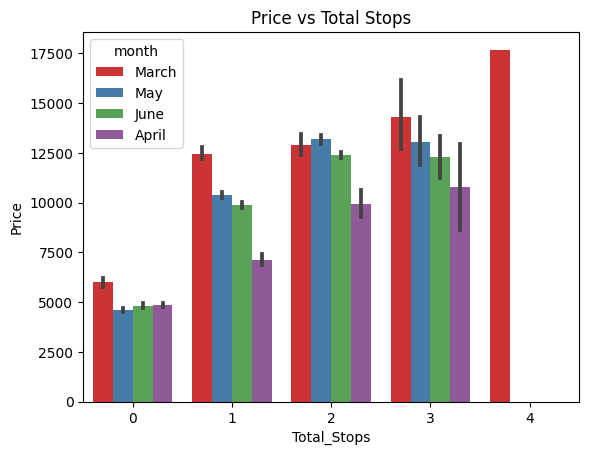

In [35]:
sns.barplot(x = 'Total_Stops' ,y='Price',data=flight,palette='Set1',hue='month')
plt.title('Price vs Total Stops')
plt.show()

## As we see in our barplot of 'Total_Stops vs Price', The prices of '4 Stops' flights is too high in the month of 'March' (only) and the prices of 'non-stops' flights is lowest in all the four 'months'.

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the  Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to  identify these factors, and how would you present your findings to the management team? 

In [36]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,March
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,May
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,June
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,May
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,March


## As a data scientist working for an airline company, there are several features I would analyze to identify the factors that affect flight prices. Some of the important features that can potentially impact the flight prices are:

- ### Source and Destination Cities: The prices of the flights may vary based on the popularity of the route, the competition among airlines, and the demand for travel between the two cities.

- ### Travel Dates and Time: The prices of flights tend to be higher during peak travel seasons or holidays, time of the day, and the duration of the trip.

In [37]:
flight['Journey'] = flight['Source'] + ' - ' + flight['Destination']

In [38]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,March,Banglore - New Delhi
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,May,Kolkata - Banglore
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,June,Delhi - Cochin
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,May,Kolkata - Banglore
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,March,Banglore - New Delhi


In [39]:
flight['Journey'].unique()

array(['Banglore - New Delhi', 'Kolkata - Banglore', 'Delhi - Cochin',
       'Chennai - Kolkata', 'Banglore - Delhi', 'Mumbai - Hyderabad'],
      dtype=object)

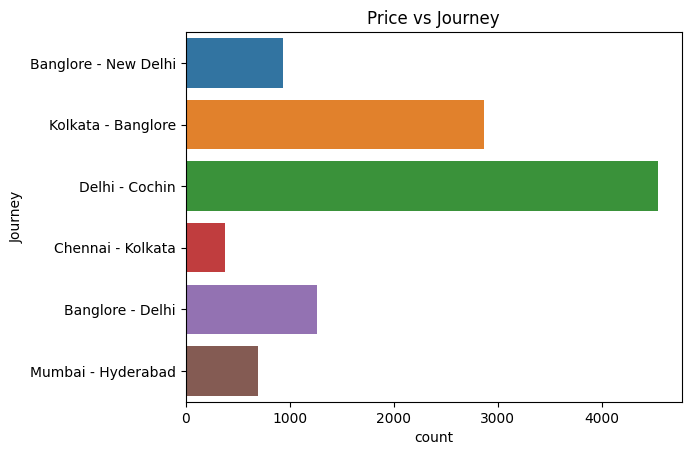

In [40]:
sns.countplot(y ='Journey' , data=flight )
plt.title('Price vs Journey')
plt.show()

## As we see in out barplot, the demand of 'Delhi - Cochin' flight is high and low for 'Chennai - Kolkata' . 

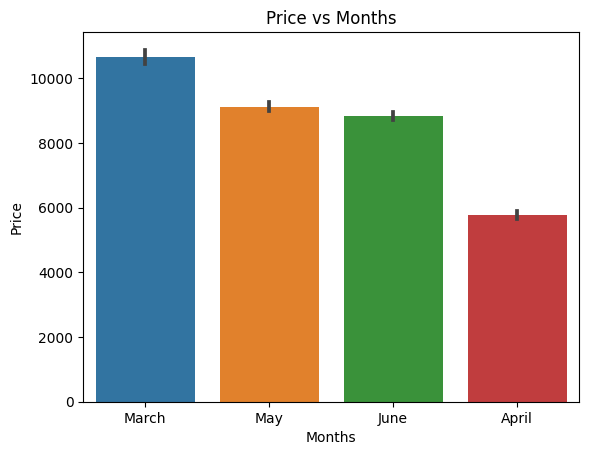

In [41]:
sns.barplot(x='month',y='Price',data=flight)
plt.title('Price vs Months')
plt.xlabel('Months')
plt.show()

## As we see in our barplot, the flight prices are high in the month of 'March' while low in 'April'.

# Google Playstore EDA

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does  the dataset have? 

In [43]:
store = pd.read_csv('google_playstore.csv')

In [44]:
store.shape

(10841, 13)

## After using store.shape method we can see that there are 10841 rows and 13 columns in the given dataset.

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different  app categories. 

In [45]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


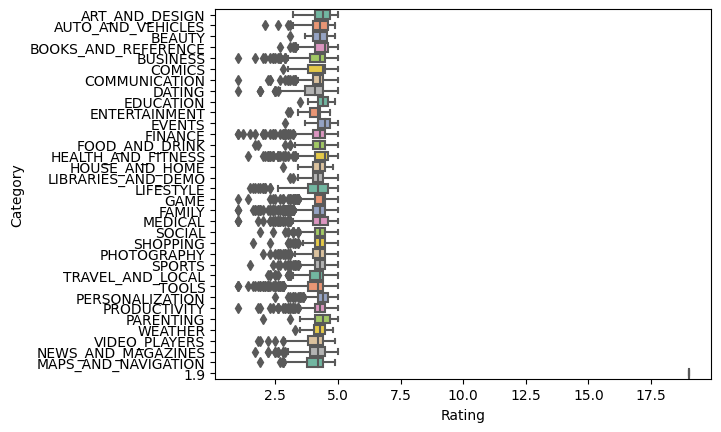

In [46]:
sns.boxplot(x='Rating', y='Category' , data = store , orient='h', palette='Set2')
plt.show()

### As we see in out boxplot, the rating of each catergory is almost similar.

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may  impact your analysis. 

In [47]:
store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### As we see, Rating, Type, Content Rating ,Current Ver and Android Ver has 1474, 1, 1, 8,  3  number of missing values respectively.

### Missing values can have a significant impact on our analysis because they can lead to biased and inaccurate results. The following are some of the impacts of missing values in our analysis:

- ### Reduced sample size: Missing values reduce the sample size, which can affect the accuracy of your model. If a significant number of observations have missing values, you may need to consider dropping those observations, which can lead to a reduction in the sample size and, in turn, a less robust model.

- ### Biased results: If the missing data is not missing at random, it can lead to biased results. For example, if missing values in a survey are more likely to be from a specific group of respondents, this can bias the results of the survey towards that group.

- ### Inaccurate analysis: If the missing data is not handled properly, it can lead to inaccurate analysis. For example, if you use the mean or median imputation method to fill in missing values, it can distort the distribution of the data and lead to incorrect conclusions.

- ### Model instability: Missing data can lead to model instability, as the missing values can cause errors and inconsistencies in the model. This can lead to a less reliable model and less accurate predictions.

### To address missing data in our analysis, we can use various techniques such as imputation, deletion, or model-based methods. It is important to carefully consider the impact of missing data on our analysis and choose the appropriate method to handle it.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize  the relationship. 

In [48]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Handling missing values of Rating column

In [49]:
store[store['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [50]:
mean = store['Rating'].mean()
mean

4.193338315362443

In [51]:
store['Rating'] = store['Rating'].fillna(mean)

In [52]:
store['Rating'].isnull().sum()

0

In [53]:
store['Rating'] = store['Rating'].astype(object)

In [54]:
store.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [55]:
store.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.193338,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,4.193338,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### We replaces the null values with the mean of rating column.

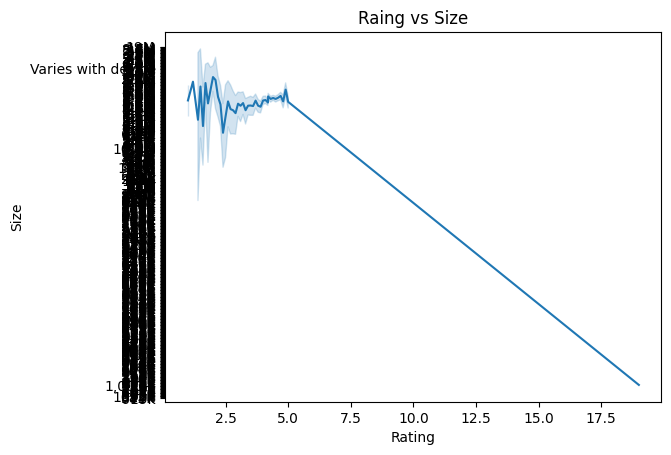

In [56]:
sns.lineplot(x=store.Rating,y=store.Size)
plt.title('Raing vs Size')
plt.show()

### As we see in our lineplot the relationship between rating and size is non-linear till 5.0 rating but after that the size of the app is decreasing as the rating of the app is increasing.

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type. 

In [57]:
store = pd.read_csv('google_playstore.csv')

In [58]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Handling missing values in Type and Price columns

In [59]:
store['Type'].isna().sum()

1

In [60]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [61]:
mode = store['Type'].mode()
mode

0    Free
Name: Type, dtype: object

In [62]:
store['Type'] = store['Type'].replace(np.nan,'Free')

In [63]:
store['Type'].isna().sum()

0

In [64]:
store['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [65]:
store['Price'] = store['Price'].replace('0','$0')

In [66]:
mode = store['Price'].mode()
mode

0    $0
Name: Price, dtype: object

In [67]:
store['Price'] = store['Price'].replace('Everyone','$0')

In [68]:
store['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [69]:
store['Type'] = store['Type'].replace('0','Free')

In [70]:
store['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [71]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,$0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,$0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,$0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,$0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,$0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [72]:
store['Price'] = store['Price'].str.split('$').str[1]

In [73]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [74]:
store['Price'] = store['Price'].astype(float)

In [75]:
store[store['Price'] != 0]['Price'].mean()

13.920837500000003

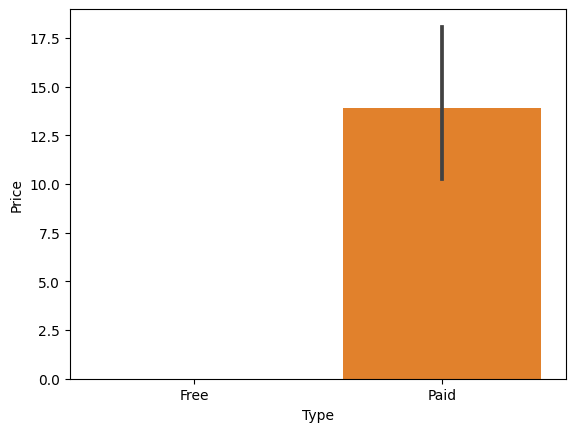

In [76]:
sns.barplot(x = 'Type',y = 'Price', data = store)
plt.show()

## As we see in the barplot, the average price of the app ( $ 13.92 ) is increasing as we go for paid app.

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps  with the highest number of installs. 

In [115]:
store = pd.read_csv('google_playstore.csv')

In [116]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Cleaning Installs

In [117]:
store['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [118]:
mode = store['Installs'].mode()
mode

0    1,000,000+
Name: Installs, dtype: object

In [119]:
store[store['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [120]:
store['Installs'] = store['Installs'].replace('Free','1,000,000+')

In [121]:
store['Installs'] = store['Installs'].replace(',','',regex=True)

In [122]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000+,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000+,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000+,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000+,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000+,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [123]:
store['Installs'].value_counts()

1000000+       1580
10000000+      1252
100000+        1169
10000+         1054
1000+           907
5000000+        752
100+            719
500000+         539
50000+          479
5000+           477
100000000+      409
10+             386
500+            330
50000000+       289
50+             205
5+               82
500000000+       72
1+               67
1000000000+      58
0+               14
0                 1
Name: Installs, dtype: int64

In [124]:
store['Installs'] = store['Installs'].replace('0','0+')

In [125]:
store['Installs'].unique()

array(['10000+', '500000+', '5000000+', '50000000+', '100000+', '50000+',
       '1000000+', '10000000+', '5000+', '100000000+', '1000000000+',
       '1000+', '500000000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '0+'], dtype=object)

In [126]:
store['Installs'] = store['Installs'].str.split('+').str[0]

In [127]:
store['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [128]:
store['Installs'] = store['Installs'].astype(int)

In [129]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


### Removing duplicates rows:

In [130]:
store.drop_duplicates(subset='App',inplace=True)

In [131]:
store.shape

(9660, 13)

## The 10 most popular apps in play store are:

In [132]:
store.sort_values(by = ['Installs','Rating','Reviews'],ascending=[False,False,False]).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3454,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


### The frequency table with highest number of installs

In [133]:
store[['App','Installs']].sort_values(by='Installs',ascending=False)

,App,Installs
3454,Google Drive,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
2545,Instagram,1000000000
338,Google Chrome: Fast & Secure,1000000000
152,Google Play Books,1000000000
...,...,...
6692,cronometra-br,0
5486,AP Series Solution Pro,0
8081,CX Network,0
8871,Test Application DT 02,0


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the  Google Playstore dataset to identify the most popular app categories. How would you approach this  task, and what features would you analyze to make recommendations to the company? 

In [134]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [135]:
store['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [136]:
store['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [137]:
store['Category'] = store['Category'].replace('1.9','FAMILY')

In [138]:
store['Category'].value_counts()

FAMILY                 1833
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [139]:
store.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4428941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

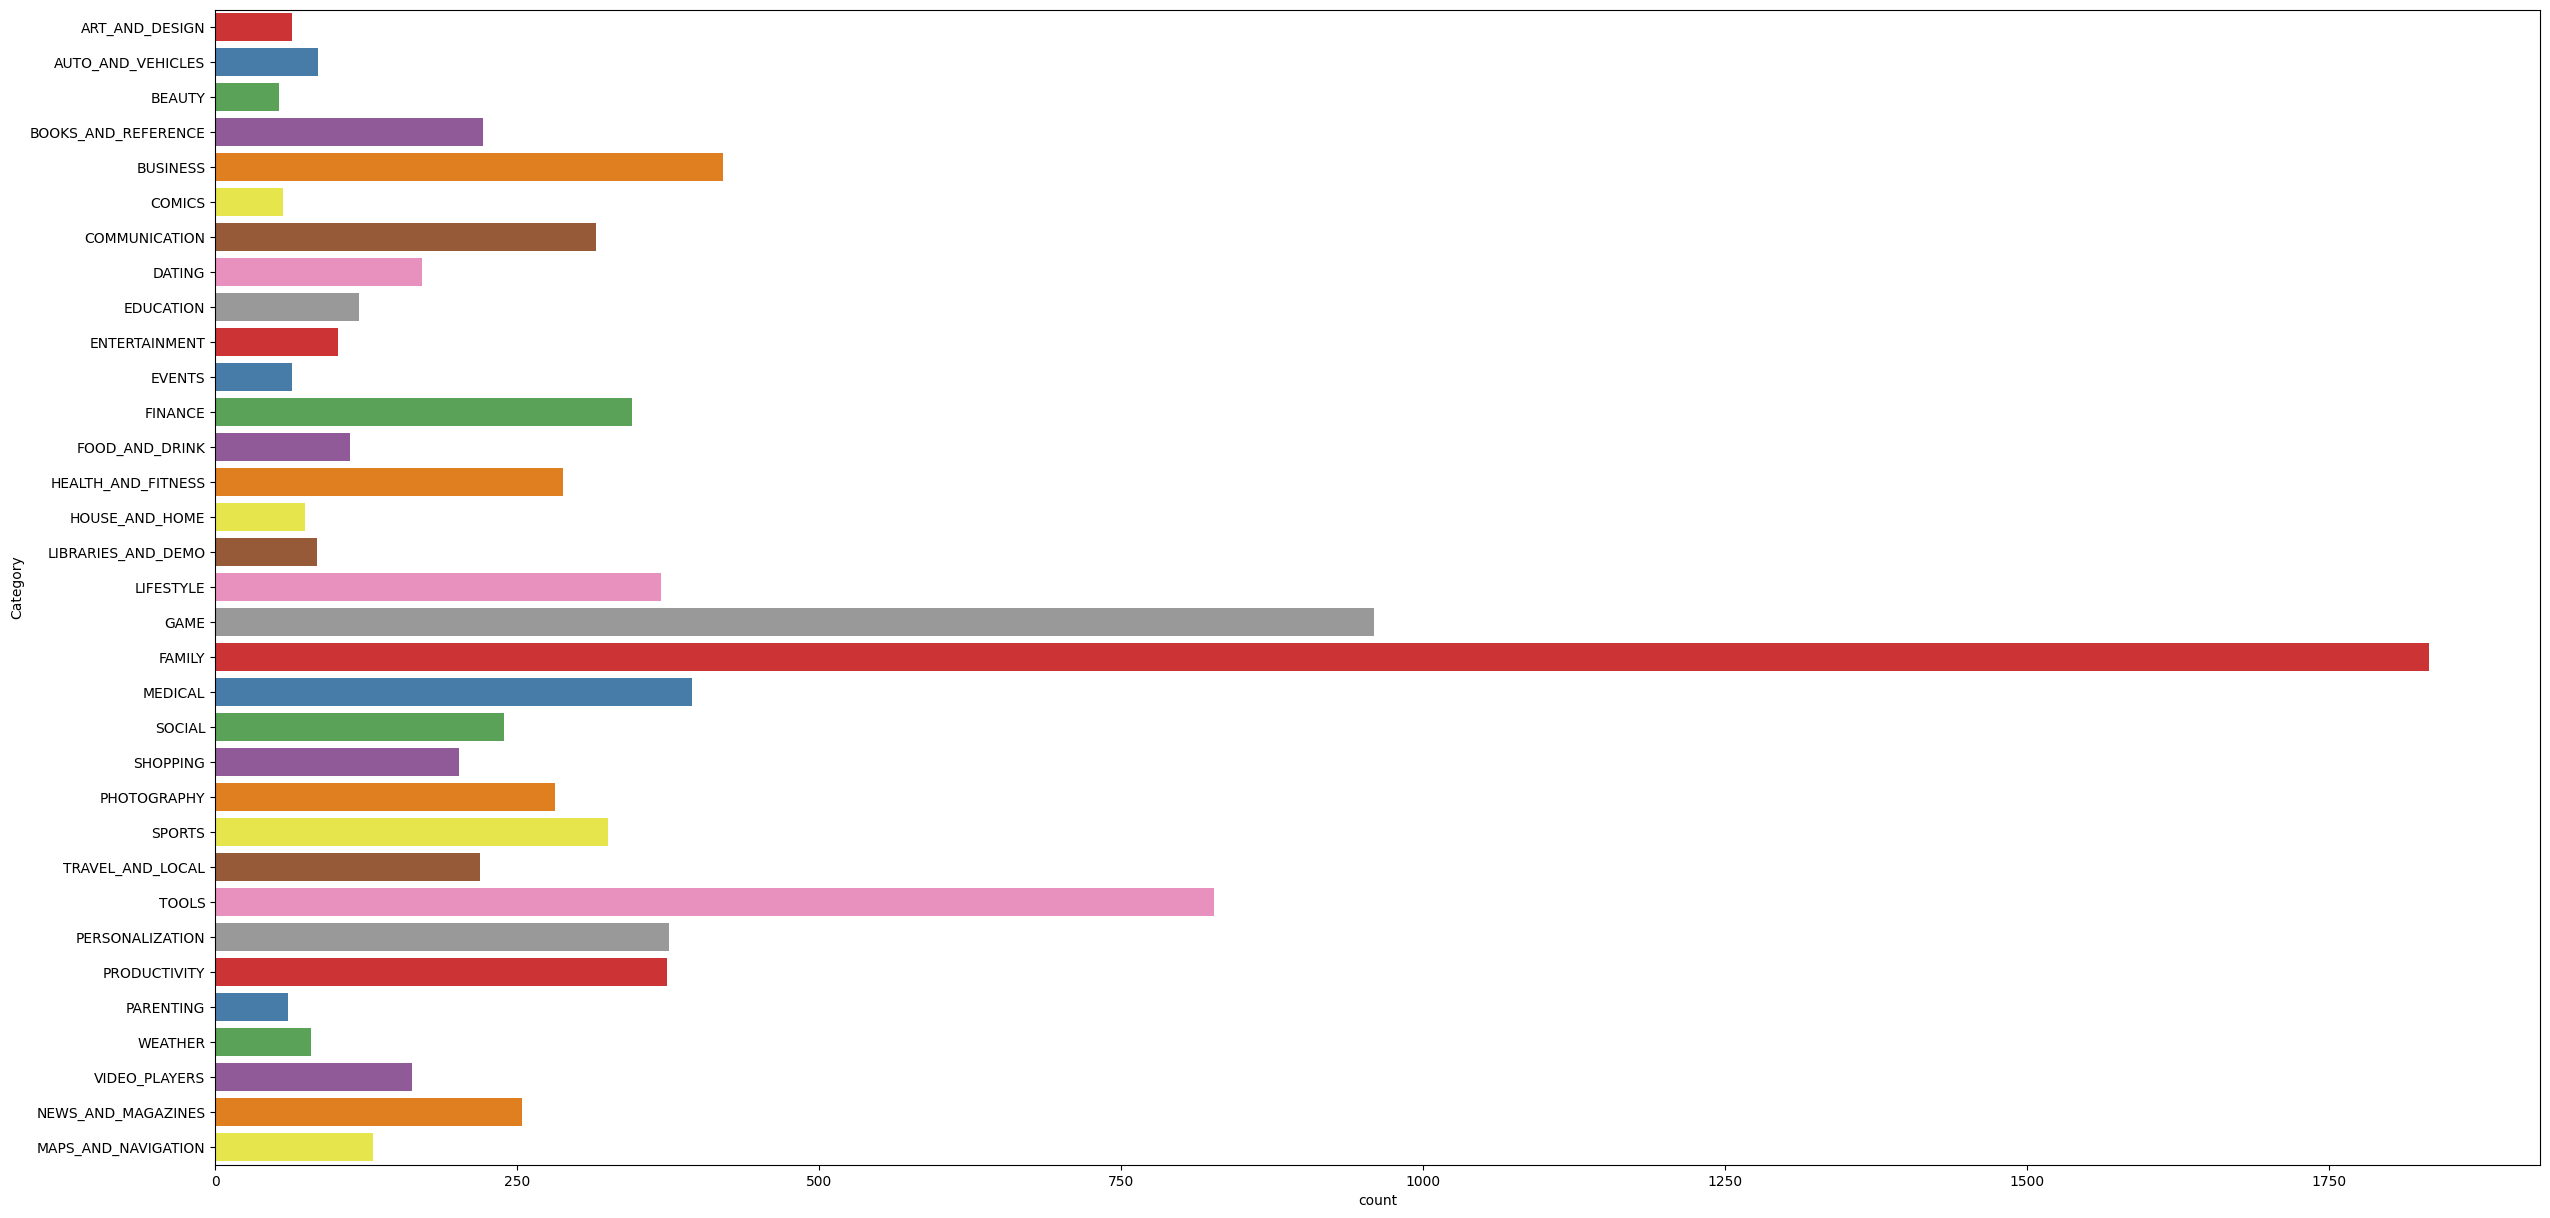

In [140]:
plt.figure(figsize=(30,15))
sns.countplot(y=store.Category,palette='Set1',orient='h')
plt.show()

### As we see, with the help of group method and countplot, the most installed app category in google play stroe is 'GAME' followed by 'COMMUNICATION' and 'TOOLS'.
### And, Among three, the 'GAME' category has most no of apps on play store followed by 'TOOLS' and 'COMMUNICATION'
### So, I recommend the company to launch the new app either in 'GAME' or 'COMMUNICATION' or 'TOOLS' category to gain a title of most popular app in shortest possible time.

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the  most successful app developers. What features would you analyze to make recommendations to the  company, and what data visualizations would you use to present your findings? 

In [197]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June


## There is no 'Developer' named column in the given dataset, So this analysis can not possible.

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to  launch a new app. What features would you analyze to make recommendations to the company, and  what data visualizations would you use to present your findings? 

In [141]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### To make the launch time recommendation we have to analyze the 'Last Updated' feature and extract the 'Month' column from it.

In [142]:
store['Month'] = store['Last Updated'].str.split(' ').str[0]

In [143]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June


In [146]:
store['Month'].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February', '1.0.19'],
      dtype=object)

In [147]:
store['Month'].mode()

0    July
Name: Month, dtype: object

In [149]:
store['Month'] = store['Month'].replace('1.0.19','July')

In [150]:
store['Month'].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February'], dtype=object)

### Month which has most app installs

In [154]:
store.groupby('Month')['Installs'].sum().sort_values(ascending=False)

Month
August       31031058529
July         28646201819
June          4854349574
May           3646908327
April         1455524919
December      1037049147
January       1031288286
November       895133297
March          894067825
February       769351455
October        448042024
September      414962325
Name: Installs, dtype: int64

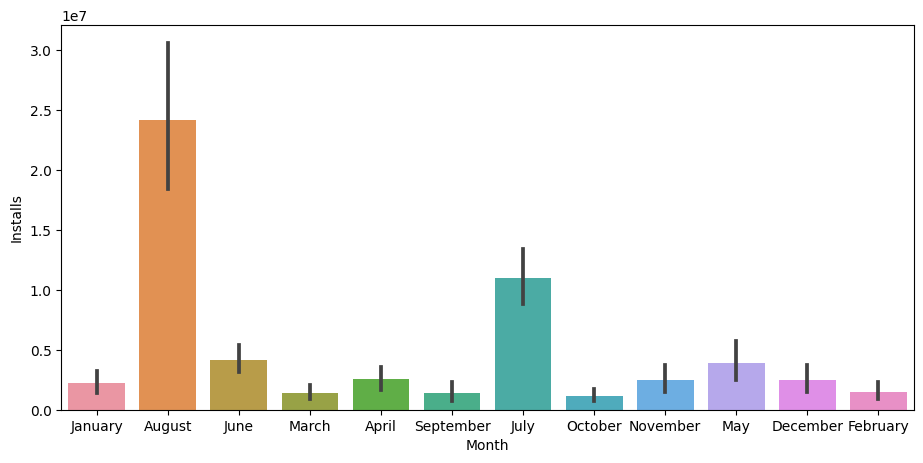

In [181]:
plt.figure(figsize=(11,5))
sns.barplot(x=store.Month, y=store.Installs)
plt.show()

### As we see with the help of barplot, Most of the apps are updated in the month of 'August' followed by 'July'.
- ### So, I recommend the company to launch the new app either in the month of 'July' or 'August'.